In [1]:
# importing libs
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# imports ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics

%matplotlib inline

In [2]:
# Data storage in dataframe
df = pd.read_csv('CIDDS.csv')

In [3]:
# Show data head
df.head()

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
0,2017-03-14 17:43:57.172,81412.697,TCP,EXT_SERVER,8082,OPENSTACK_NET,56978.0,3057,2.1 M,1,.AP...,0,normal,---,---,---
1,2017-03-14 17:43:57.172,81412.697,TCP,OPENSTACK_NET,56978,EXT_SERVER,8082.0,4748,2.5 M,1,.AP...,0,normal,---,---,---
2,2017-03-14 17:43:26.135,81504.787,TCP,EXT_SERVER,8082,OPENSTACK_NET,56979.0,8639,9.1 M,1,.AP...,0,normal,---,---,---
3,2017-03-14 17:43:26.135,81504.787,TCP,OPENSTACK_NET,56979,EXT_SERVER,8082.0,12024,10.3 M,1,.AP...,0,normal,---,---,---
4,2017-03-14 18:17:09.005,82100.692,TCP,EXT_SERVER,8082,OPENSTACK_NET,51649.0,11012,27.2 M,1,.AP.S.,0,normal,---,---,---


In [4]:
# show number rows and columns
df.shape 

(172838, 16)

In [5]:
# show columns names
df.columns

Index(['Date first seen', 'Duration', 'Proto', 'Src IP Addr', 'Src Pt',
       'Dst IP Addr', 'Dst Pt', 'Packets', 'Bytes', 'Flows', 'Flags', 'Tos',
       'class', 'attackType', 'attackID', 'attackDescription'],
      dtype='object')

In [6]:
# Checking for NULL values
df.isnull().sum()

Date first seen      0
Duration             0
Proto                0
Src IP Addr          0
Src Pt               0
Dst IP Addr          0
Dst Pt               0
Packets              0
Bytes                0
Flows                0
Flags                0
Tos                  0
class                0
attackType           0
attackID             0
attackDescription    0
dtype: int64

In [7]:
# view the values in the class
df["class"].value_counts()

suspicious    107344
normal         49606
unknown        15888
Name: class, dtype: int64

In [8]:
# show data type for each column
df.dtypes

Date first seen       object
Duration             float64
Proto                 object
Src IP Addr           object
Src Pt                 int64
Dst IP Addr           object
Dst Pt               float64
Packets                int64
Bytes                 object
Flows                  int64
Flags                 object
Tos                    int64
class                 object
attackType            object
attackID              object
attackDescription     object
dtype: object

<AxesSubplot:>

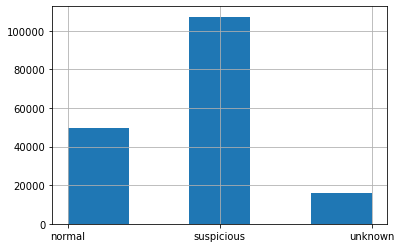

In [9]:
# visual class
df['class'].hist(bins=5)

<AxesSubplot:xlabel='class', ylabel='count'>

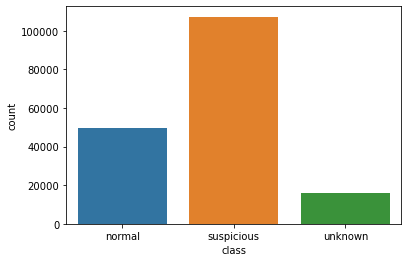

In [10]:
sns.countplot(x = "class",data=df)

C:\Users\muteb\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\muteb\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\muteb\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\muteb\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\muteb\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\muteb\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

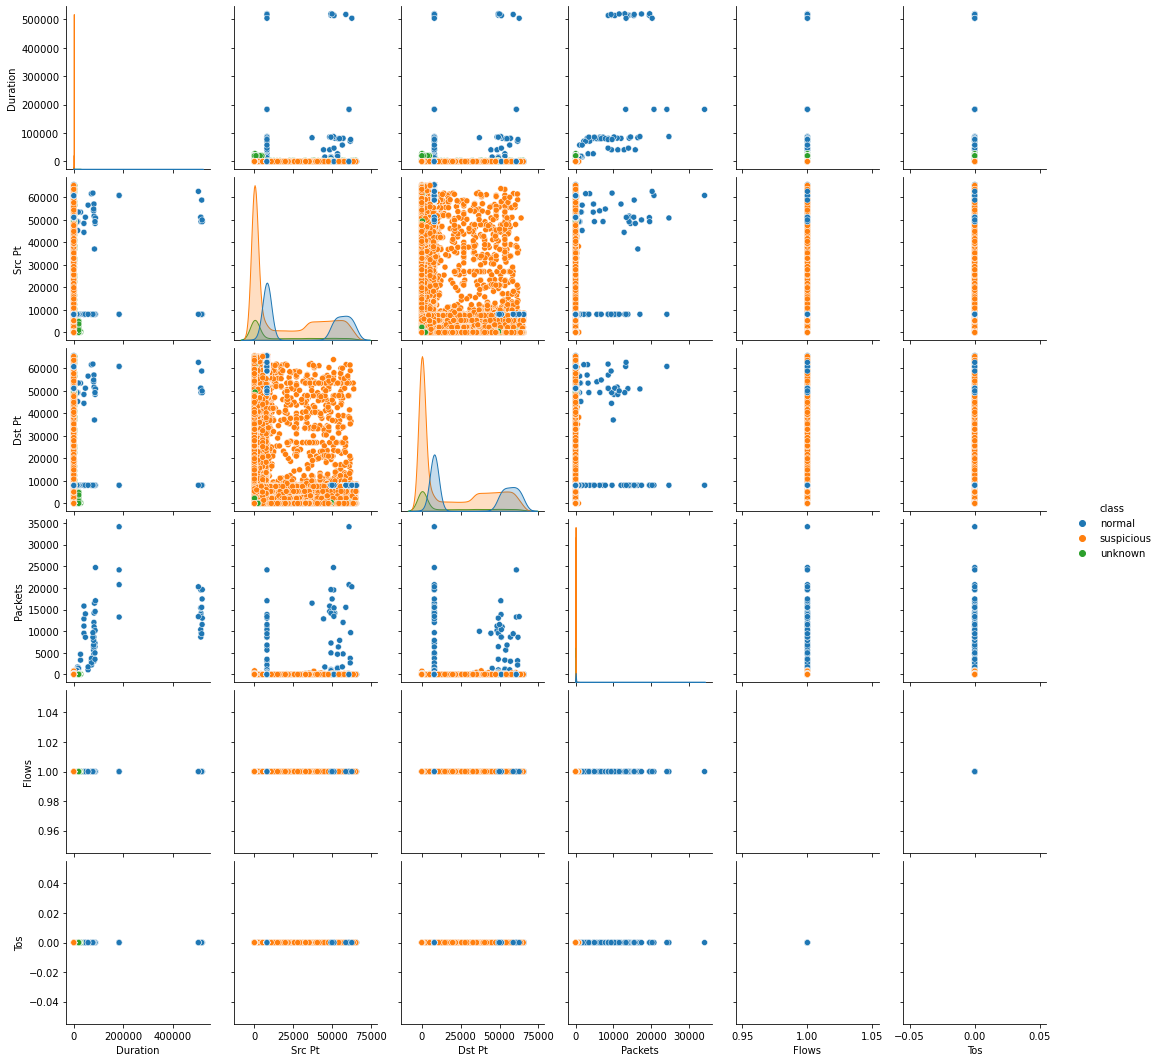

In [11]:
sns.pairplot(df, hue='class')

In [12]:
# split flag
def set_flag(data,check):
    i=0;
    if(check in list(data["Flags"])):
        i = 1 ;
    return i;

In [13]:
df["A"] = df.apply(set_flag,check ="A", axis = 1)
df["P"] = df.apply(set_flag,check = "P" ,axis = 1)
df["S"] = df.apply(set_flag,check ="S",axis = 1)
df["R"] = df.apply(set_flag,check="R" ,axis = 1)
df["F"] = df.apply(set_flag,check ="F" ,axis = 1)
df["x"] = df.apply(set_flag,check ="x" ,axis = 1)

In [14]:
df.columns

Index(['Date first seen', 'Duration', 'Proto', 'Src IP Addr', 'Src Pt',
       'Dst IP Addr', 'Dst Pt', 'Packets', 'Bytes', 'Flows', 'Flags', 'Tos',
       'class', 'attackType', 'attackID', 'attackDescription', 'A', 'P', 'S',
       'R', 'F', 'x'],
      dtype='object')

<AxesSubplot:xlabel='A', ylabel='count'>

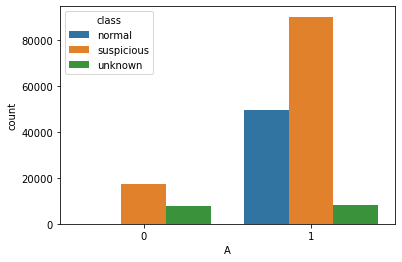

In [15]:
sns.countplot(x="A",hue ="class",data=df)

In [17]:

import re
def convot(data):
    num1=data["Bytes"]
    if "M" in data["Bytes"]:
        num=re.findall("[0-9.0-9]",data["Bytes"])
        num1 = float("".join(num))*100000
    num1 = float(num1)
    return num1

In [18]:
df["Bytes"] = df.apply(convot,axis = 1)

In [19]:
df.head()

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,...,class,attackType,attackID,attackDescription,A,P,S,R,F,x
0,2017-03-14 17:43:57.172,81412.697,TCP,EXT_SERVER,8082,OPENSTACK_NET,56978.0,3057,210000.0,1,...,normal,---,---,---,1,1,0,0,0,0
1,2017-03-14 17:43:57.172,81412.697,TCP,OPENSTACK_NET,56978,EXT_SERVER,8082.0,4748,250000.0,1,...,normal,---,---,---,1,1,0,0,0,0
2,2017-03-14 17:43:26.135,81504.787,TCP,EXT_SERVER,8082,OPENSTACK_NET,56979.0,8639,910000.0,1,...,normal,---,---,---,1,1,0,0,0,0
3,2017-03-14 17:43:26.135,81504.787,TCP,OPENSTACK_NET,56979,EXT_SERVER,8082.0,12024,1030000.0,1,...,normal,---,---,---,1,1,0,0,0,0
4,2017-03-14 18:17:09.005,82100.692,TCP,EXT_SERVER,8082,OPENSTACK_NET,51649.0,11012,2720000.0,1,...,normal,---,---,---,1,1,1,0,0,0


In [20]:
df=df.drop(columns = ["Date first seen","attackType","attackID","attackDescription","Flows","Tos","Flags"])

In [21]:
df.head()

,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,class,A,P,S,R,F,x
0,81412.697,TCP,EXT_SERVER,8082,OPENSTACK_NET,56978.0,3057,210000.0,normal,1,1,0,0,0,0
1,81412.697,TCP,OPENSTACK_NET,56978,EXT_SERVER,8082.0,4748,250000.0,normal,1,1,0,0,0,0
2,81504.787,TCP,EXT_SERVER,8082,OPENSTACK_NET,56979.0,8639,910000.0,normal,1,1,0,0,0,0
3,81504.787,TCP,OPENSTACK_NET,56979,EXT_SERVER,8082.0,12024,1030000.0,normal,1,1,0,0,0,0
4,82100.692,TCP,EXT_SERVER,8082,OPENSTACK_NET,51649.0,11012,2720000.0,normal,1,1,1,0,0,0


In [22]:
# Encoder columns to  numeric 
from sklearn.preprocessing import LabelEncoder
col = ["Proto","class","Src IP Addr","Dst IP Addr"]
en = LabelEncoder()
for colname in col:
    df[colname]=en.fit_transform(df[colname])

In [23]:
df.head()

,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,class,A,P,S,R,F,x
0,81412.697,2,10537,8082,10477,56978.0,3057,210000.0,0,1,1,0,0,0,0
1,81412.697,2,10538,56978,10476,8082.0,4748,250000.0,0,1,1,0,0,0,0
2,81504.787,2,10537,8082,10477,56979.0,8639,910000.0,0,1,1,0,0,0,0
3,81504.787,2,10538,56979,10476,8082.0,12024,1030000.0,0,1,1,0,0,0,0
4,82100.692,2,10537,8082,10477,51649.0,11012,2720000.0,0,1,1,1,0,0,0


In [24]:
df.dtypes

Duration       float64
Proto            int32
Src IP Addr      int32
Src Pt           int64
Dst IP Addr      int32
Dst Pt         float64
Packets          int64
Bytes          float64
class            int32
A                int64
P                int64
S                int64
R                int64
F                int64
x                int64
dtype: object

# Model

In [25]:
from sklearn.model_selection import train_test_split
y = df["class"]
x = df.drop(columns = ["class"])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [26]:
dtc = DecisionTreeClassifier() 
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [27]:
acc = dtc.score(X_test, y_test)

print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 99.92%


In [28]:
sample_input = pd.DataFrame(pd.Series({
    'Duration': 0.000,
    'Proto': 2,
    'Src IP Addr': 23,
    'rc Pt': 65,
    'Dst IP Addr': 7,
    'Dst Pt': 96978.0,
    'Packets': 12024,
    'Bytes': 5720000.0,
    'A': 0,
    'P': 0,
    'S': 0,
    'R': 1,
    'F': 1,
    'x': 1,
})).T

prediction = dtc.predict(sample_input)
print("Class:", prediction)

Class: [1]


# ML

In [29]:

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    kf.get_n_splits(data)
    error = []
    
    for train, test in kf.split(data):
    # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

# K Nearest Neighbor(KNN) 

In [30]:
outcome_var = 'class'
model = KNeighborsClassifier(n_neighbors=3)
predictor_var = ['Duration','Proto','Src IP Addr','Dst IP Addr','Dst Pt','Packets','Bytes','A','P','S','R','F','x']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 99.493%
Cross-Validation Score : 92.144%


# Multi-layer Perceptron classifier

In [31]:
outcome_var = 'class'
model = MLPClassifier()
predictor_var = ['Duration','Src IP Addr','Dst IP Addr','Packets','Bytes','P','R','F']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 96.308%
Cross-Validation Score : 96.574%


# Gaussian Naive Bayes

In [32]:
outcome_var = 'class'
model = GaussianNB()
predictor_var = ['Duration','Src IP Addr','Dst IP Addr','Packets','Bytes','P','R','F']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 90.757%
Cross-Validation Score : 90.466%


# Decision Tree

In [33]:
outcome_var = 'class'
model = DecisionTreeClassifier()
predictor_var = ['Duration','Proto','Src IP Addr','Dst IP Addr','Packets','Bytes','A','P','S','R','F','x']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 99.972%
Cross-Validation Score : 93.076%


# Random Forest

In [34]:
outcome_var = 'class'
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Duration','Proto','Src IP Addr','Dst IP Addr','Packets','Bytes','A','P','S','R','F','x']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 99.972%
Cross-Validation Score : 94.518%


# Feature Importances

AxesSubplot(0.125,0.125;0.775x0.755)


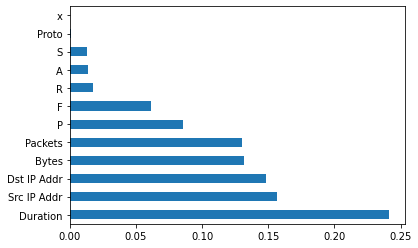

In [35]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False).plot(kind='barh')
print (featimp)



# The best model and the high Accuracy 

In [36]:
# Random Forest
outcome_var = 'class'
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['Duration','Src IP Addr','Dst IP Addr','Packets','Bytes','P','R','F']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 98.977%
Cross-Validation Score : 98.659%


In [44]:
from sklearn.metrics import classification_report
rf=RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14831
           1       0.99      1.00      0.99     32251
           2       0.99      0.94      0.96      4770

    accuracy                           0.99     51852
   macro avg       0.99      0.98      0.99     51852
weighted avg       0.99      0.99      0.99     51852

